### Redes Neuronales Convolucionales (CNN)

Situación: Eres un investigador que quiere clasificar imágenes de ropa (prendas) en 10 categorías diferentes usando el dataset **Fashion-MNIST**.

#### Paso 1: Importaciones

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Verificar versión de TensorFlow
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


#### Paso 2: Cargar y Exportar Datos

In [2]:
# Cargar dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Explorar forma de los datos
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)


x_train: 60 mil imágenes de 28x28 píxeles.  
y_train: 60 mil etiquetas.

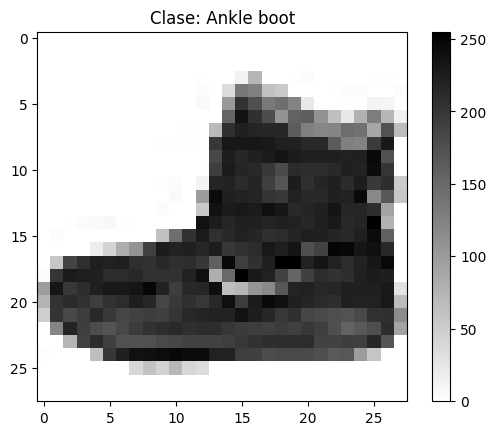

In [3]:
# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar una imagen
plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.title(f"Clase: {class_names[y_train[0]]}")
plt.colorbar()

plt.show()

#### Paso 3: Preprocesamiento

In [4]:
# Normalizar píxeles (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Añadir dimensión de canal (blanco-negro -> 1 canal)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Convertir etiquetas a one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### Paso 4: Construit la CNN

In [5]:
# Crear modelo secuencial
modelo = models.Sequential()

# Capa convolucional 1
modelo.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional 2
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional 3
modelo.add(layers.Conv2D(32, (3, 3), activation = 'relu'))

# Aplanar y conectar a capas densas
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation = 'relu'))
modelo.add(layers.Dense(10, activation = 'softmax'))

# Resumen del modelo
modelo.summary()

c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,426 (220.41 KB)

 Trainable params: 56,426 (220.41 KB)

 Non-trainable params: 0 (0.00 B)

#### Paso 5: Compilar y Entrenar

In [6]:
# Compilar modelo
modelo.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# Entrenar
history = modelo.fit(x_train, y_train,
                     epochs = 10,
                     batch_size = 64,
                     validation_split = 0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.6857 - loss: 0.8531 - val_accuracy: 0.8517 - val_loss: 0.4106
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8621 - loss: 0.3865 - val_accuracy: 0.8750 - val_loss: 0.3463
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8850 - loss: 0.3188 - val_accuracy: 0.8849 - val_loss: 0.3115
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8942 - loss: 0.2915 - val_accuracy: 0.8873 - val_loss: 0.3141
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9049 - loss: 0.2637 - val_accuracy: 0.8923 - val_loss: 0.2907
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9137 - loss: 0.2372 - val_accuracy: 0.8992 - val_loss: 0.2723
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9160 - loss: 0.2237 - val_accuracy: 0.9062 - val_loss: 0.2584
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9226 - loss: 0.2098 - 

#### Paso 6: Evaluar y Visualizar Resultados

313/313 - 2s - 7ms/step - accuracy: 0.9068 - loss: 0.2622

Precision en test: 0.9068


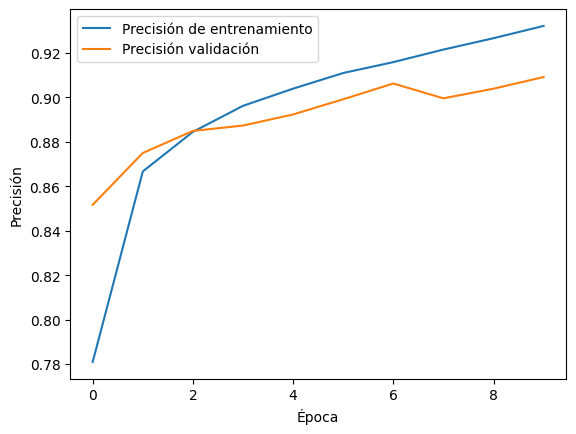

In [7]:
# Evaluar en test
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose = 2)
print(f"\nPrecision en test: {test_acc:.4f}")

# Gráfico de precisión
plt.plot(history.history['accuracy'], label = 'Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()

Ejercicio CNN:

1. Modifica la arquitectura: añade una capa convolucional más con 128 filtros.
2. Combina el optimizador a SGD y compara los resultados.
3. Visualiza las predicciones incorrectas en el conjunto de prueba.